In [25]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cluster import DBSCAN

In [26]:
intervention = pd.read_parquet(r"C:\KU Leuven\Modern Data Analytics - MDA\MDA Project\MDA\preprocess_intervention\intvn_clean.parquet")

# create a subset only containing the columns we need: 'latitude intervention', 'longitude intervention', 'eventtype firstcall', 'eventlevel trip','same event type'
intervention_subset = intervention[['latitude intervention', 'longitude intervention', 'eventtype firstcall', 'eventtype trip'
                                    ,'same event type']]
#  we only need rows with 'P039 - Cardiac problem (other than thoracic pain)', 'P003 - Cardiac arrest'
cardiac = intervention_subset[intervention_subset['eventtype firstcall'].isin(['P039 - Cardiac problem (other than thoracic pain)', 'P003 - Cardiac arrest'])]
cardiac

,latitude intervention,longitude intervention,eventtype firstcall,eventtype trip,same event type
16,51.29850,4.47723,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1
23,51.20685,5.13662,P003 - Cardiac arrest,P003 - Cardiac arrest,1
49,51.24848,4.43869,P003 - Cardiac arrest,P003 - Cardiac arrest,1
69,51.20303,4.34549,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1
98,51.05218,4.63286,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1
...,...,...,...,...,...
338419,50.45987,4.83580,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1
338456,50.33426,4.90938,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1
338460,50.51792,4.77706,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1
338467,50.71017,4.51832,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1


In [27]:
# count missing values
cardiac.isnull().sum()

latitude intervention     7
longitude intervention    5
eventtype firstcall       0
eventtype trip            0
same event type           0
dtype: int64

In [28]:
type(cardiac)

pandas.core.frame.DataFrame

In [29]:
# drop missing values
cardiac = cardiac.dropna()

C:\Users\Johnn\AppData\Local\Temp\ipykernel_15376\1600084338.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



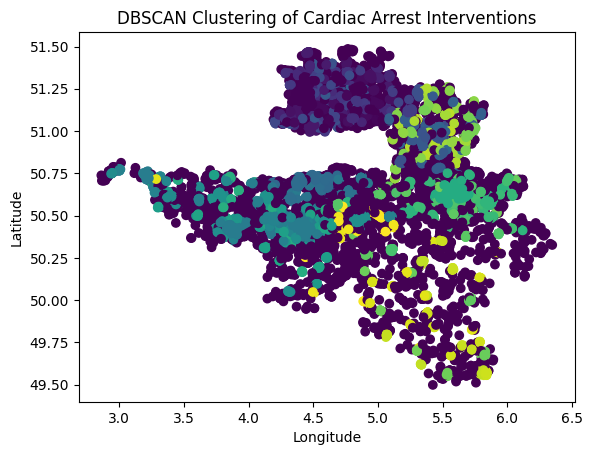

In [30]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model
dbscan.fit(cardiac[['longitude intervention', 'latitude intervention']])

# Get cluster labels
cardiac['cluster'] = dbscan.labels_

# Plot the clusters
plt.scatter(cardiac['longitude intervention'], cardiac['latitude intervention'], c=cardiac['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Cardiac Arrest Interventions')
plt.show()

In [31]:
# Initialize DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=5)  # Adjust eps and min_samples as needed

# Fit the model
dbscan.fit(cardiac[['longitude intervention', 'latitude intervention']])

# Get cluster labels
cardiac['cluster'] = dbscan.labels_


C:\Users\Johnn\AppData\Local\Temp\ipykernel_15376\2017831844.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
cardiac

,latitude intervention,longitude intervention,eventtype firstcall,eventtype trip,same event type,cluster
16,51.29850,4.47723,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1,0
23,51.20685,5.13662,P003 - Cardiac arrest,P003 - Cardiac arrest,1,1
49,51.24848,4.43869,P003 - Cardiac arrest,P003 - Cardiac arrest,1,2
69,51.20303,4.34549,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1,3
98,51.05218,4.63286,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1,4
...,...,...,...,...,...,...
338419,50.45987,4.83580,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1,213
338456,50.33426,4.90938,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1,-1
338460,50.51792,4.77706,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1,-1
338467,50.71017,4.51832,P039 - Cardiac problem (other than thoracic pain),P039 - Cardiac problem (other than thoracic pain),1,146


In [33]:
cardiac["same event type"].value_counts()

same event type
1    12990
0      182
Name: count, dtype: int64

In [34]:
cardiac.to_csv("C:\KU Leuven\Modern Data Analytics - MDA\MDA Project\MDA\Clustering\cardiac.csv",index=False)

In [36]:
cardiac = pd.read_csv(r"C:\KU Leuven\Modern Data Analytics - MDA\MDA Project\MDA\Clustering\cardiac.csv",index_col=False)

In [37]:
cardiac = pd.read_csv(r"C:\KU Leuven\Modern Data Analytics - MDA\MDA Project\MDA\Clustering\cardiac.csv",index_col=False)

# Your Mapbox access token
mapbox_access_token = 'pk.eyJ1Ijoid2VuaGFuY3UiLCJhIjoiY2x3cTlrYjlnMDAybTJqczdzOWFwcWpjdyJ9.yNEGbGM7vNhqbdfdfFNTng'

labels={"cluster":"Cardiac Arrest Level"}
# Create the map
fig = px.scatter_mapbox(cardiac, lat='latitude intervention', lon='longitude intervention',
                        color='cluster',
                        center=dict(lat=50.8503, lon=4.3517), 
                        zoom=7, 
                        mapbox_style="open-street-map",
                        title="Clustered Municipalities Based on Cardiac Arrests",
                        labels=labels)  # Use an appropriate Mapbox style

# Update the layout with your Mapbox token
fig.update_layout(mapbox=dict(accesstoken=mapbox_access_token))

# Show the figure
fig.show()

# Kmeans

/var/folders/cv/bbbq9ykj0jg6pt6c7tx5_vjh0000gn/T/ipykernel_32760/472453239.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



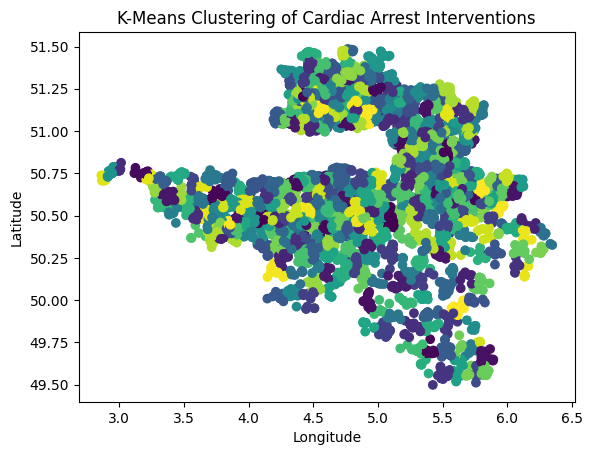

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Initialize K-Means
kmeans = KMeans(n_clusters=365)  # Choose an appropriate number of clusters

# Fit the model
kmeans.fit(cardiac[['longitude intervention', 'latitude intervention']])

# Get cluster labels
cardiac['cluster'] = kmeans.labels_

# Plot the clusters
plt.scatter(cardiac['longitude intervention'], cardiac['latitude intervention'], c=cardiac['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering of Cardiac Arrest Interventions')
plt.show()


In [13]:
# Use the DBSCAN or K-Means results
fig = px.scatter_mapbox(cardiac, lat='latitude intervention', lon='longitude intervention',
                        color='cluster', 
                        center=dict(lat=50.8503, lon=4.3517), 
                        zoom=7, 
                        mapbox_style="stamen-terrain")
fig.show()
